In [507]:
import pandas as pd

In [508]:
df = pd.read_csv("D:\\anacoda\\DL DATA NOTES\\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [509]:
x = df.drop('customerID' , axis = 1 )
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [510]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [511]:
x.shape

(7043, 20)

## First we need to check the data is correct or not 

In [512]:
x.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [513]:
x.PaymentMethod.values

array(['Electronic check', 'Mailed check', 'Mailed check', ...,
       'Electronic check', 'Mailed check', 'Bank transfer (automatic)'],
      dtype=object)

In [514]:
x.TotalCharges.values   # this are in string we need to remove the string and it convert object into float64

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [515]:
#pd.to_numeric(x.TotalCharges)   # It show the error because it contain the " " Total charges

In [516]:
                                                          # isnull() is compulsary
pd.to_numeric(x.TotalCharges , errors='coerce').isnull()  # "coerce" is used to minimize the error

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

###  Below Line not Necessary

In [517]:
x1 = x[pd.to_numeric(df.TotalCharges , errors='coerce').isnull()]  # isnull() is compulsary

In [518]:
x1                     # it shows the empty total charges values    # empty = " "

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [519]:
x1.shape

(11, 20)

In [520]:
x.shape

(7043, 20)

In [521]:
x.iloc[488]  # don't use the x1 , because it is just used to see the data

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

##  Remove the Empty Total charges 

###  7043 - 11 = 7032

In [522]:
x2 = x[x.TotalCharges!= ' ' ]   # no space in between != and space between ' '

In [523]:
x2.shape

(7032, 20)

In [524]:
x2.dtypes        # it is again Total Charges show in object only

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [525]:
x2_Total_charges = pd.to_numeric(x2.TotalCharges)  # now it did not show the error  # line 1

In [526]:
x2_Total_charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [527]:
x2_Total_charges.dtypes

dtype('float64')

## it will show the colums of the data 

In [528]:
for column in x:
    
#     print(x[column].unique()) 
    print(f'{column} :- {x[column].unique()}')    # we can use x or x1 or x2 but Total charges will change so x is good 

gender :- ['Female' 'Male']
SeniorCitizen :- [0 1]
Partner :- ['Yes' 'No']
Dependents :- ['No' 'Yes']
tenure :- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :- ['No' 'Yes']
MultipleLines :- ['No phone service' 'No' 'Yes']
InternetService :- ['DSL' 'Fiber optic' 'No']
OnlineSecurity :- ['No' 'Yes' 'No internet service']
OnlineBackup :- ['Yes' 'No' 'No internet service']
DeviceProtection :- ['No' 'Yes' 'No internet service']
TechSupport :- ['No' 'Yes' 'No internet service']
StreamingTV :- ['No' 'Yes' 'No internet service']
StreamingMovies :- ['No' 'Yes' 'No internet service']
Contract :- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :- ['Yes' 'No']
PaymentMethod :- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :- [29.85 56.95 53

##  if we want only object values

In [529]:
for column in x:                   # we can use any word in place of the column
    
    if x[column].dtypes == 'object':
        print(f'{column}')
        


gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [530]:
def print_unique_columns(x):
    for column in x:       # we can use any word in place of the column
    
       if x[column].dtypes == 'object':
            print(f'{column} :- {x[column].unique()}')

In [531]:
print_unique_columns(x1)

gender :- ['Female' 'Male']
Partner :- ['Yes' 'No']
Dependents :- ['Yes']
PhoneService :- ['No' 'Yes']
MultipleLines :- ['No phone service' 'No' 'Yes']
InternetService :- ['DSL' 'No']
OnlineSecurity :- ['Yes' 'No internet service' 'No']
OnlineBackup :- ['No' 'No internet service' 'Yes']
DeviceProtection :- ['Yes' 'No internet service' 'No']
TechSupport :- ['Yes' 'No internet service' 'No']
StreamingTV :- ['Yes' 'No internet service' 'No']
StreamingMovies :- ['No' 'No internet service' 'Yes']
Contract :- ['Two year' 'One year']
PaperlessBilling :- ['Yes' 'No']
PaymentMethod :- ['Bank transfer (automatic)' 'Mailed check' 'Credit card (automatic)']
TotalCharges :- [' ']
Churn :- ['No']


In [532]:
x2.replace('No phone service' , 'No', inplace=True )
x2.replace('No internet service' , 'No' , inplace=True)


C:\Users\periv\AppData\Local\Temp\ipykernel_11960\21870637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.replace('No phone service' , 'No', inplace=True )
C:\Users\periv\AppData\Local\Temp\ipykernel_11960\21870637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.replace('No internet service' , 'No' , inplace=True)


In [533]:
print_unique_columns(x2)

gender :- ['Female' 'Male']
Partner :- ['Yes' 'No']
Dependents :- ['No' 'Yes']
PhoneService :- ['No' 'Yes']
MultipleLines :- ['No' 'Yes']
InternetService :- ['DSL' 'Fiber optic' 'No']
OnlineSecurity :- ['No' 'Yes']
OnlineBackup :- ['Yes' 'No']
DeviceProtection :- ['No' 'Yes']
TechSupport :- ['No' 'Yes']
StreamingTV :- ['No' 'Yes']
StreamingMovies :- ['No' 'Yes']
Contract :- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :- ['Yes' 'No']
PaymentMethod :- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :- ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :- ['No' 'Yes']


###   Churn and tenure

In [534]:
X = x2[x2.Churn =='Yes'].tenure    # we need to write any given data in place of tenure
Y = x2[x2.Churn =='No'].tenure    # we need to write == compulsary

In [535]:
import matplotlib.pyplot as plt

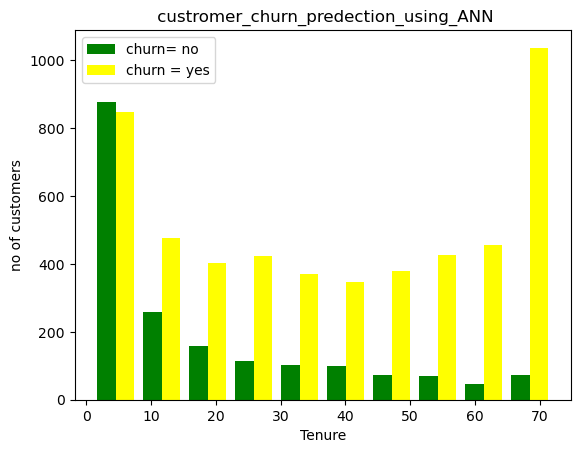

In [536]:
# in this type of graphs we need to use ([ ])

plt.xlabel('Tenure')
plt.ylabel('no of customers')    # the y axis is show the no of data
plt.title(' custromer_churn_predection_using_ANN')

plt.hist([X , Y] , color=['green' , 'Yellow'] , label=['churn= no' , 'churn = yes'])
plt.legend()  # legend is used to show the above data

###  This is the example we can do like this by using differnt data

In [537]:
X1 = x2[x2.gender =='Male'].Contract
Y1 = x2[x2.gender =='Female'].Contract

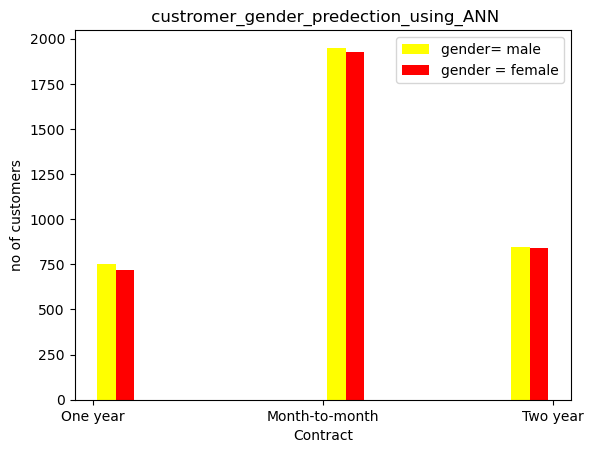

In [538]:
# in this type of graphs we need to use ([ ])

plt.xlabel('Contract')
plt.ylabel('no of customers')
plt.title(' custromer_gender_predection_using_ANN')

plt.hist([X1 , Y1] , color=['yellow' , 'red'] , label=['gender= male' , 'gender = female'])
plt.legend()  # legend is used to show the above data

# To change the Data into 0 and 1

In [539]:
x2.replace('Yes' , 1 ,inplace=True)
x2.replace('No' , 0 ,inplace=True)

C:\Users\periv\AppData\Local\Temp\ipykernel_11960\1553622788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.replace('Yes' , 1 ,inplace=True)
C:\Users\periv\AppData\Local\Temp\ipykernel_11960\1553622788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.replace('No' , 0 ,inplace=True)


In [540]:
x2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


# Scale the Data

In [541]:
from sklearn.preprocessing import MinMaxScaler

In [542]:
scaler = MinMaxScaler()

In [543]:
scaled = ['tenure' , 'TotalCharges' , 'MonthlyCharges' ]
x2[scaled] = scaler.fit_transform(x2[scaled])
x2

C:\Users\periv\AppData\Local\Temp\ipykernel_11960\1155619854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[scaled] = scaler.fit_transform(x2[scaled])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,0.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,Male,0,0,0,0.464789,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,Male,0,0,0,0.014085,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,Male,0,0,0,0.619718,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,Female,0,0,0,0.014085,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,0.323944,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,0.662189,0.227521,0
7039,Female,0,1,1,1.000000,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),0.845274,0.847461,0
7040,Female,0,1,1,0.140845,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,0.112935,0.037809,0
7041,Male,1,1,0,0.042254,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,0.558706,0.033210,1


In [544]:
# x2['PaymentMethod'] = label_encoder.fit_transform(x2['PaymentMethod'])
# x2['PaymentMethod']

# One Hot encoding

In [545]:
z = pd.get_dummies(data=x2 , columns=['PaymentMethod' ,'Contract' , 'InternetService'])
z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,Female,0,1,0,0.000000,0,0,0,1,0,...,False,False,True,False,True,False,False,False,True,False
1,Male,0,0,0,0.464789,1,0,1,0,1,...,False,False,False,True,False,True,False,False,True,False
2,Male,0,0,0,0.014085,1,0,1,1,0,...,False,False,False,True,True,False,False,False,True,False
3,Male,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,False,True,False,False,True,False
4,Female,0,0,0,0.014085,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,0.323944,1,1,1,0,1,...,False,False,False,True,False,True,False,False,True,False
7039,Female,0,1,1,1.000000,1,1,0,1,1,...,False,True,False,False,False,True,False,False,False,True
7040,Female,0,1,1,0.140845,0,0,1,0,0,...,False,False,True,False,True,False,False,False,True,False
7041,Male,1,1,0,0.042254,1,1,0,0,0,...,False,False,False,True,True,False,False,False,False,True


# Change the one hot encoding true and false to  0 and 1 

In [546]:
z.replace({False:0 , True:1} , inplace=True)



## Don't use below Method , The below data can also change  but True Or False it will Not change

# z.replace('True' , 1 ,inplace=True)
# z.replace('False' , 0 ,inplace=True)

In [547]:
z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,Female,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,Male,0,0,0,0.464789,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
2,Male,0,0,0,0.014085,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
3,Male,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
4,Female,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,0.323944,1,1,1,0,1,...,0,0,0,1,0,1,0,0,1,0
7039,Female,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
7040,Female,0,1,1,0.140845,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7041,Male,1,1,0,0.042254,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


# Change the Male and female to 0 and 1

In [548]:
z.replace('Male' , 1 , inplace=True)
z.replace('Female' , 0 , inplace=True)

In [549]:
z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,0,0,0,1,0,1,0,0,1,0
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
7040,0,0,1,1,0.140845,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


#  we will do the Train_Test_model

In [550]:
M = z.drop('Churn' ,axis=1)
M

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,0,0,0,1,0,1,0,0,1,0
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
7040,0,0,1,1,0.140845,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [551]:
N = z['Churn']
N

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [552]:
from sklearn.model_selection import train_test_split

In [553]:
x_train , x_test , y_train , y_test = train_test_split(M , N , test_size=0.2 , random_state=5) 

In [554]:
x_train.shape

(5625, 26)

In [555]:
x_test.shape

(1407, 26)

In [556]:
y_train.shape

(5625,)

In [557]:
y_test.shape

(1407,)

##  we can take the  " len(x_train.columns) " as input shape

In [558]:
len(x_train.columns)

26

In [559]:
len(x_test.columns)

26

In [560]:
# y_train and y_test have only One Column

In [561]:
import tensorflow as tf
from tensorflow import keras

In [562]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(26,)),
    keras.layers.Dense(20 , activation="relu"),
    keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train , y_train , epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.7552
Epoch 2/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.7954
Epoch 3/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8009
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8037
Epoch 5/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8076


##  if we are getting error while import imblearn then do the below process

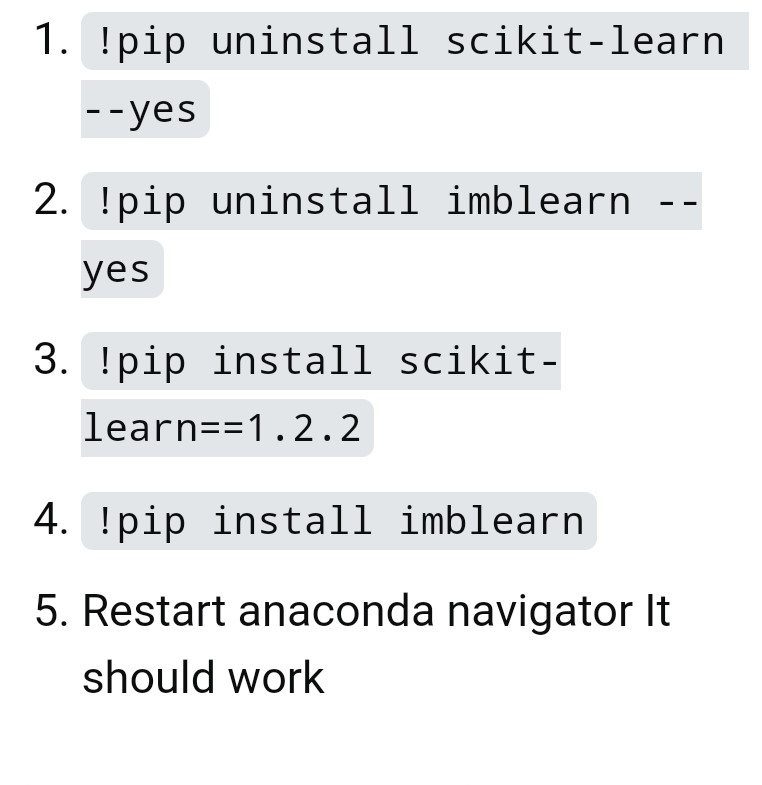

# OVER_SAMPLING & SMOTE are same

# over_sampling

In [563]:
from imblearn.over_sampling import RandomOverSampler

In [564]:
ros = RandomOverSampler(random_state=30)
ros

RandomOverSampler(random_state=30)

In [620]:
x_res , y_res = ros.fit_resample(M , N)  # if we use x_train and y_train in place of M & N we get another values , that using in below

In [621]:
M.shape

(7032, 26)

In [622]:
N.shape

(7032,)

In [623]:
x_res.shape

(10326, 26)

In [624]:
y_res.shape

(10326,)

## counter 

In [670]:
from collections import Counter

In [671]:
print(f'before under_sampling{Counter(N)}')   # the 0 are more and 1 are less 

before under_samplingCounter({0: 5163, 1: 1869})


In [672]:
print(f'After under_sampling {Counter(y_res)}')   # it will balance the data 0 and 1  in largest values

After under_sampling Counter({0: 5163, 1: 5163})


### train test split

In [ ]:
# if we are using the x_train and y_train in palce of M & N in above , then also we get the same values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.2 , random_state=5 , stratify=y_res) 

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

#  SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='minority')  # we can use random_stae also but sampling_startegy is perfect
sm

In [ ]:
x1_res , y1_res = sm.fit_resample(M , N)

In [ ]:
print(f'before under_sampling{Counter(N)}')   # the 0 are more and 1 are less 

In [ ]:
print(f'After under_sampling {Counter(y1_res)}')   # it will balance the data 0 and 1  in More values

### train test split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x1_res , y1_res , test_size=0.2 , random_state=5 , stratify=y1_res) 

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

# UNDER_SAMPLING & NEARMISS are same

# under_sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=30)
rus

In [ ]:
x2_res , y2_res = rus.fit_resample(M , N)  # if we use x_train and y_train in place of M & N we get another values

In [ ]:
x2_res.shape

In [ ]:
y2_res.shape

In [ ]:
M.shape

In [ ]:
N.shape

##  Counter

In [ ]:
from collections import Counter

In [ ]:
print(f'before under_sampling{Counter(N)}')   # the 0 are more and 1 are less 

In [ ]:
print(f'After under_sampling {Counter(y2_res)}')   # it will balance the data 0 and 1  in low values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x2_res , y2_res , test_size=0.2 , random_state=5 , stratify=y2_res) 

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

# NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss(sampling_strategy='majority')
nm

In [ ]:
x3_res , y3_res = nm.fit_resample(M , N)

In [ ]:
print(f'before under_sampling{Counter(N)}')   # the 0 are more and 1 are less 

In [ ]:
print(f'After under_sampling {Counter(y3_res)}')   # it will balance the data 0 and 1  in More values

### train test split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x3_res , y3_res , test_size=0.2 , random_state=5 , stratify=y3_res) 

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()